In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv("student-mat.csv")

data.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


<AxesSubplot:>

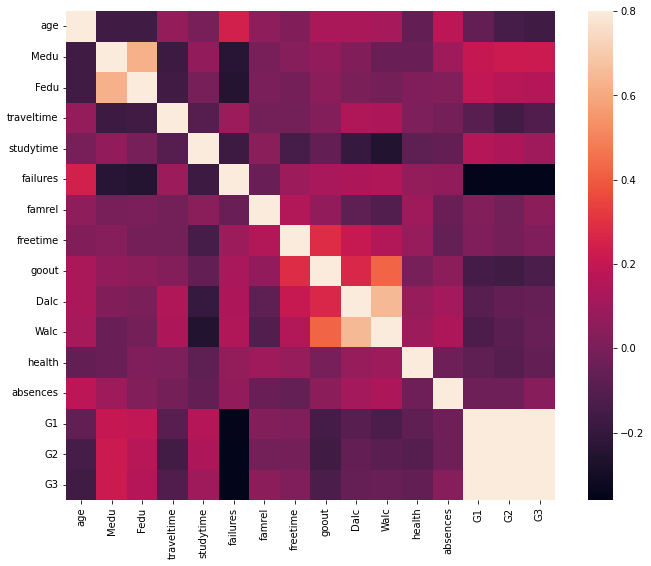

In [3]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [4]:
new_data = 	data.loc[:, ["goout", "G3"]]

In [5]:
new_data.isnull().sum()

goout    0
G3       0
dtype: int64

/Users/ayselpolat/Documents/ML-For-Beginners/venv/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='G3', ylabel='Density'>

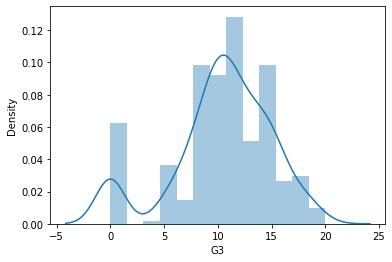

In [6]:
sns.distplot(new_data['G3'])

In [7]:
targets = new_data['G3']
inputs = new_data.drop(['G3'], axis=1)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=80)

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred = reg.predict(x_train)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

accuracy_score = reg.score(x_train,y_train)
print('Model Accuracy: ', accuracy_score)

Model Accuracy:  0.025062785417383826


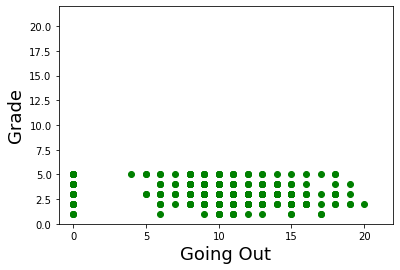

In [43]:
plt.scatter(y_train, x_train, color="green")
plt.xlabel('Going Out', size=18)
plt.ylabel('Grade', size=18)
plt.xlim(-1, 22)
plt.ylim(0, 22)
plt.show()

In [44]:
y_pred_test = reg.predict(x_test)

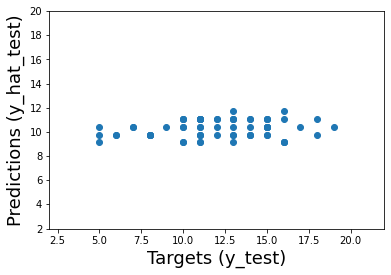

In [45]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(2, 22)
plt.ylim(2, 20)
plt.show()